# <p style="text-align: center;"> <b> Data Reading and Observation </b> </p>

In [1]:
# import needed libraries
import pandas as pd
import numpy as np

# read excel file
df = pd.read_csv('data/House_Rent_modified.csv')

# display general information of the df
display(df.info())

# display 5 random samples of our df
display(df.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4723 non-null   float64
 2   Rent               4723 non-null   float64
 3   Size               4746 non-null   int64  
 4   Floor              4746 non-null   object 
 5   Area Type          4746 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Furnishing Status  4746 non-null   object 
 9   Tenant Preferred   4723 non-null   object 
 10  Bathroom           4746 non-null   int64  
 11  Point of Contact   4723 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 445.1+ KB


None

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
1632,2022-05-27,2.0,10000.0,1200,1 out of 2,Super Area,Kengeri,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Owner
4033,2022-06-25,2.0,15000.0,1080,3 out of 4,Super Area,Anupuram Colony,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
244,2022-04-23,2.0,7000.0,450,1 out of 3,Carpet Area,safuipara,Kolkata,Furnished,Bachelors,2,Contact Owner
2212,2022-06-16,3.0,65000.0,2000,3 out of 6,Super Area,Frazer Town,Bangalore,Semi-Furnished,Bachelors,3,Contact Agent
2734,2022-07-04,3.0,15000.0,100,3 out of 4,Super Area,Chhattarpur,Delhi,Semi-Furnished,Bachelors/Family,2,Contact Owner


# <p style="text-align: center;"> <b>Feature Descriptions</b> </p>

Its clear from the summary above that the coulms (BHK, Rent, Tenant Preferred, Point of Contact) has some NaN values and need to be fixed. We will replace categorical data with the mode of the coulmns and the numrical data with the mean of the coulmn.

---

Here are the features with their types and description:

|         Name         |    Description    |                 Type                 |
| :-------------------: | :---------: | :------------------------------------------: |
BHK | Number of Bedrooms, Hall, Kitchen. | nominal |
Rent | Rent of the Houses/Apartments/Flats. | numerical |
Size | Size of the Houses/Apartments/Flats in Square Feet. | numerical |
Floor | Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.) | categorical |
Area Type | Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area. | categorical |
Area Locality | Locality of the Houses/Apartments/Flats. | categorical|
City | City where the Houses/Apartments/Flats are Located. | categorical |
Furnishing Status | Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished. | categorical |
Tenant Preferred | Type of Tenant Preferred by the Owner or Agent. | categorical |
Bathroom | Number of Bathrooms. | nominal |
Point of Contact | Whom should you contact for more information regarding the Houses/Apartments/Flats. | categorical |



# <p style="text-align: center;"><b>Data Preparation</b></p>

In [2]:
# lets fix the nan values

for col in df.columns:
    # check if the column is of object type
    if df[col].dtype == 'object':
        # replace missing values with the most occurred string
        value = df[col].mode()[0]
    else:
        # if the values are nominal(0, 1, nan) replace with mod
        if len(df[col].unique()) == 3:
            # replace missing values with the mode value
            value = df[col].mode()[0]

        else:
            # replace missing values with the mean value
            value = df[col].mean()
            
    df[col].fillna(value, inplace = True)
                
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4746 non-null   float64
 2   Rent               4746 non-null   float64
 3   Size               4746 non-null   int64  
 4   Floor              4746 non-null   object 
 5   Area Type          4746 non-null   object 
 6   Area Locality      4746 non-null   object 
 7   City               4746 non-null   object 
 8   Furnishing Status  4746 non-null   object 
 9   Tenant Preferred   4746 non-null   object 
 10  Bathroom           4746 non-null   int64  
 11  Point of Contact   4746 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 445.1+ KB


None

In [3]:
display(df.describe())

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.082786,3.503060e+04,967.490729,1.965866
std,0.829721,7.806837e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.400000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [4]:
# now we need to remove the outliers
# print(df.columns)

for col in df.columns:
    if df[col].dtype != 'object':
        Q3, Q1 = np.percentile(df[col], [75 ,25])
        IQR = Q3 - Q1
        
        # calculate the upper and lower bounds for outliers
        upper_bound = Q3 + 1.5*IQR
        lower_bound = Q1 - 1.5*IQR
        
        
        # delete the rows containing outliers
        if len(df[col].unique()) != 2 and col not in ['LONGITUDE', 'LATITUDE']:
            df =df[(df[col] <= upper_bound) & (df[col] >= lower_bound)]
display(df.describe())
display(df.info())

,BHK,Rent,Size,Bathroom
count,4082.000000,4082.000000,4082.000000,4082.000000
mean,1.912479,18708.721015,824.649682,1.755022
std,0.692289,13290.839969,408.551671,0.642569
min,1.000000,1500.000000,10.000000,1.000000
25%,1.000000,9500.000000,500.000000,1.000000
50%,2.000000,15000.000000,800.000000,2.000000
75%,2.000000,24000.000000,1100.000000,2.000000
max,4.000000,67000.000000,1970.000000,3.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4082 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4082 non-null   object 
 1   BHK                4082 non-null   float64
 2   Rent               4082 non-null   float64
 3   Size               4082 non-null   int64  
 4   Floor              4082 non-null   object 
 5   Area Type          4082 non-null   object 
 6   Area Locality      4082 non-null   object 
 7   City               4082 non-null   object 
 8   Furnishing Status  4082 non-null   object 
 9   Tenant Preferred   4082 non-null   object 
 10  Bathroom           4082 non-null   int64  
 11  Point of Contact   4082 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 414.6+ KB


None

# <p style="text-align: center;"><b>Statistical Analysis</b></p>

In [5]:
# lets find the statistical summary of our data

print("this is the statistical summary of the the categorical data:")
display(df.describe(include='object'))
print("________________________________________________________________________________")

print("\nthis is the statistical summary of the the numerical data:")
display(df.describe(exclude='object'))

this is the statistical summary of the the categorical data:


,Posted On,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
count,4082,4082,4082,4082,4082,4082,4082,4082
unique,80,331,3,1955,6,3,3,3
top,2022-07-06,1 out of 2,Super Area,Electronic City,Bangalore,Semi-Furnished,Bachelors/Family,Contact Owner
freq,231,366,2302,24,828,1897,3025,3085


________________________________________________________________________________

this is the statistical summary of the the numerical data:


,BHK,Rent,Size,Bathroom
count,4082.000000,4082.000000,4082.000000,4082.000000
mean,1.912479,18708.721015,824.649682,1.755022
std,0.692289,13290.839969,408.551671,0.642569
min,1.000000,1500.000000,10.000000,1.000000
25%,1.000000,9500.000000,500.000000,1.000000
50%,2.000000,15000.000000,800.000000,2.000000
75%,2.000000,24000.000000,1100.000000,2.000000
max,4.000000,67000.000000,1970.000000,3.000000


# <p style="text-align: center;"><b>Data Visualization</b></p>

Posted On
BHK


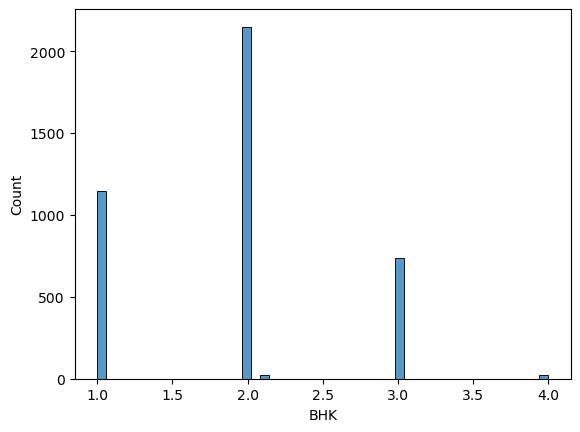

Rent


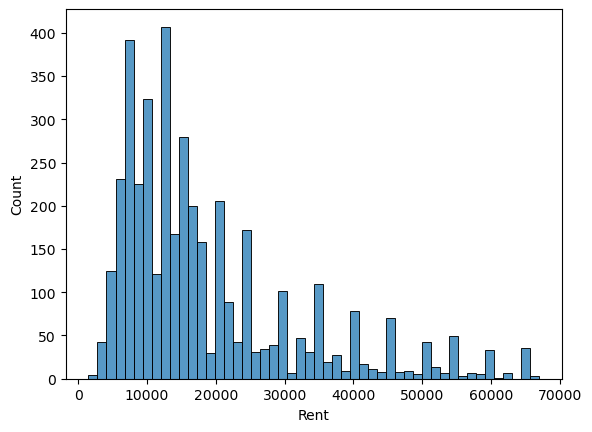

Size


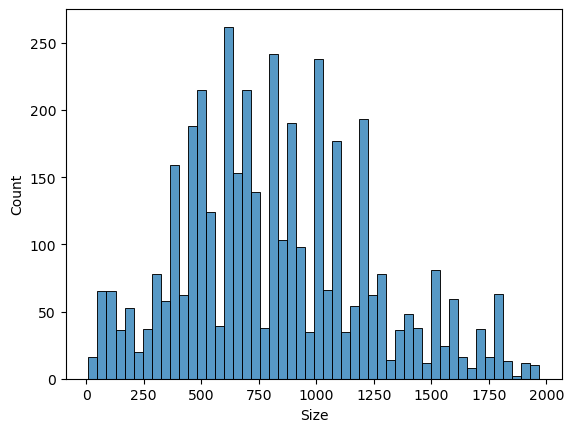

Floor
Area Type


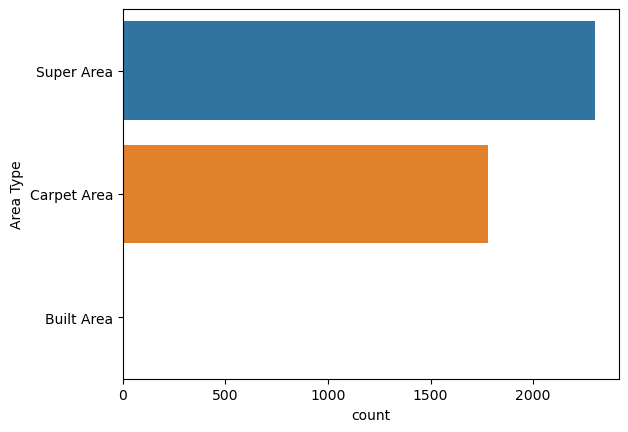

Area Locality
City


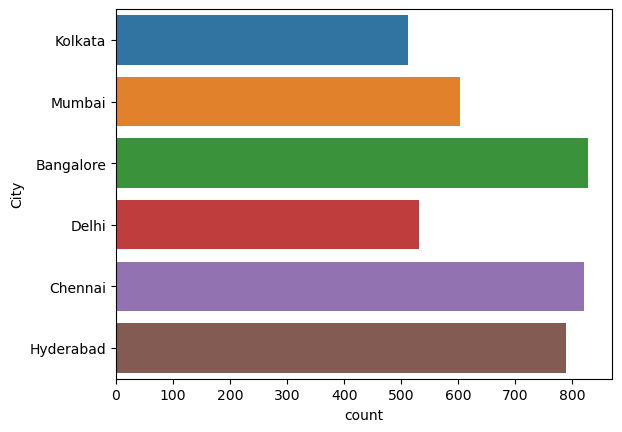

Furnishing Status


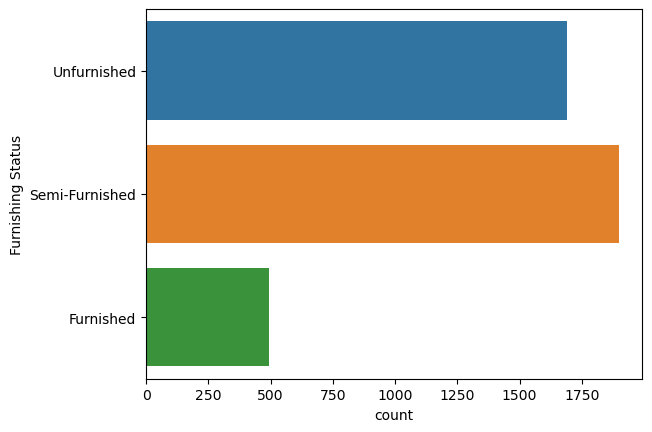

Tenant Preferred


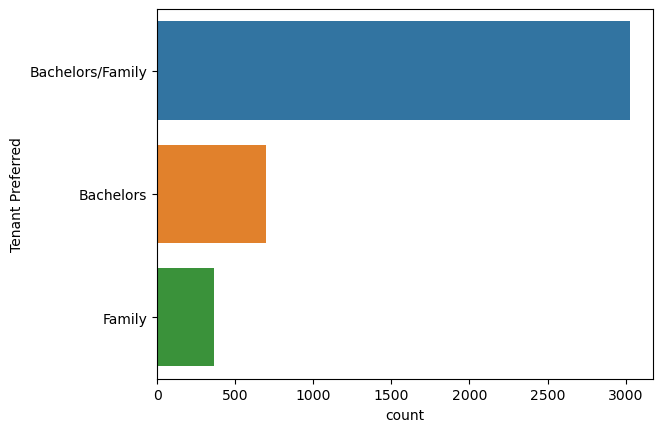

Bathroom


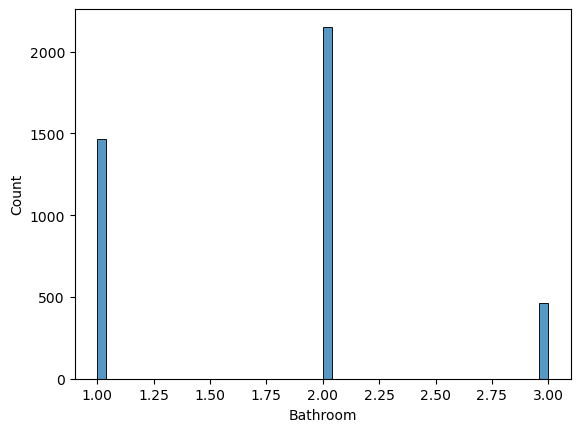

Point of Contact


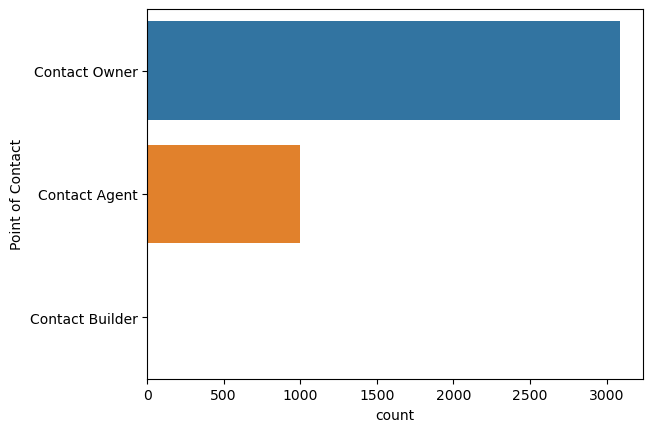

In [6]:
# histogram plots

import matplotlib.pyplot as plt
import seaborn as sns
for col in df.columns:
    print(col)
    if col != 'Posted On' and col != 'Floor' and col != 'Area Locality':
        if df[col].dtype == 'object':
            plt.figure()
            sns.countplot(y=col,data=df)
            plt.show()
        else:
            plt.figure()
            sns.histplot(x=col,bins=50,data=df)
            plt.show()

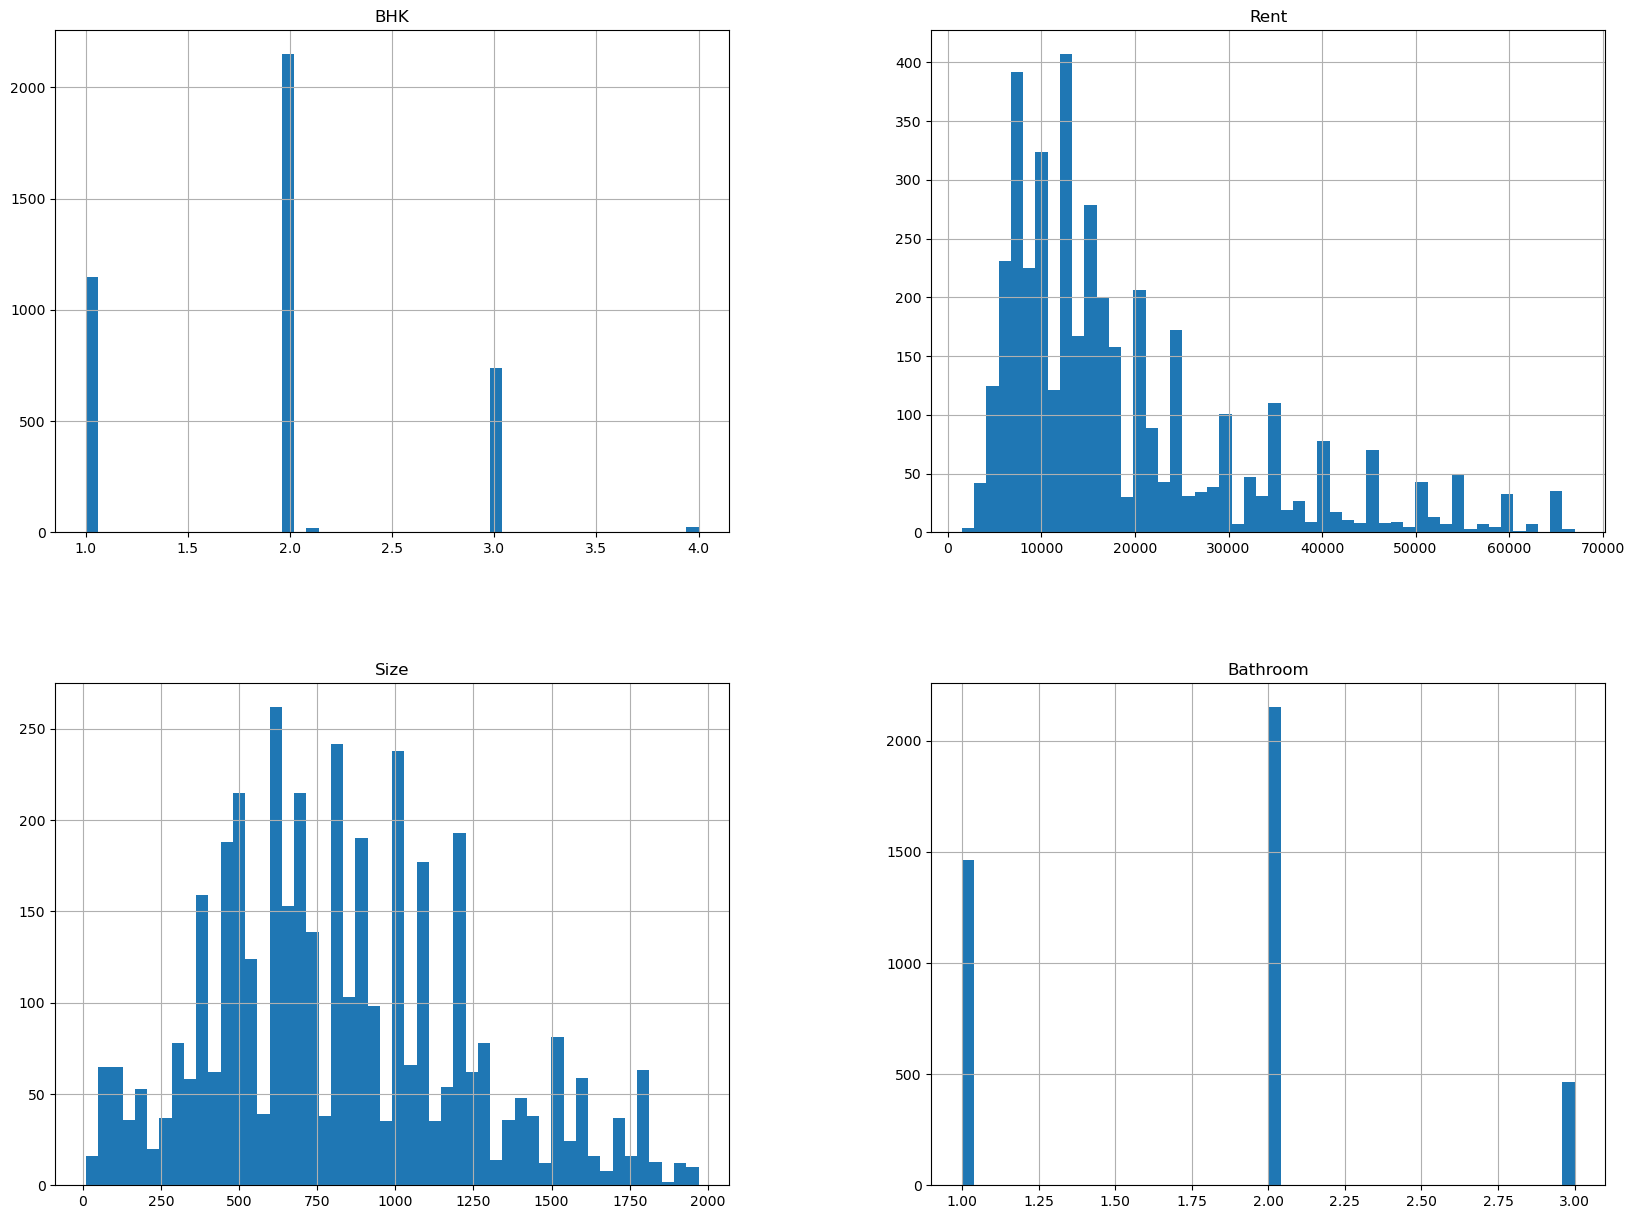

In [7]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
df.corr()['Rent'].sort_values(ascending=True)


C:\Users\mahmo\AppData\Local\Temp\ipykernel_16744\3359877582.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Rent'].sort_values(ascending=True)


Size        0.316106
BHK         0.352087
Bathroom    0.470366
Rent        1.000000
Name: Rent, dtype: float64

array([[<Axes: xlabel='Rent', ylabel='Rent'>,
        <Axes: xlabel='Bathroom', ylabel='Rent'>,
        <Axes: xlabel='BHK', ylabel='Rent'>,
        <Axes: xlabel='Size', ylabel='Rent'>],
       [<Axes: xlabel='Rent', ylabel='Bathroom'>,
        <Axes: xlabel='Bathroom', ylabel='Bathroom'>,
        <Axes: xlabel='BHK', ylabel='Bathroom'>,
        <Axes: xlabel='Size', ylabel='Bathroom'>],
       [<Axes: xlabel='Rent', ylabel='BHK'>,
        <Axes: xlabel='Bathroom', ylabel='BHK'>,
        <Axes: xlabel='BHK', ylabel='BHK'>,
        <Axes: xlabel='Size', ylabel='BHK'>],
       [<Axes: xlabel='Rent', ylabel='Size'>,
        <Axes: xlabel='Bathroom', ylabel='Size'>,
        <Axes: xlabel='BHK', ylabel='Size'>,
        <Axes: xlabel='Size', ylabel='Size'>]], dtype=object)

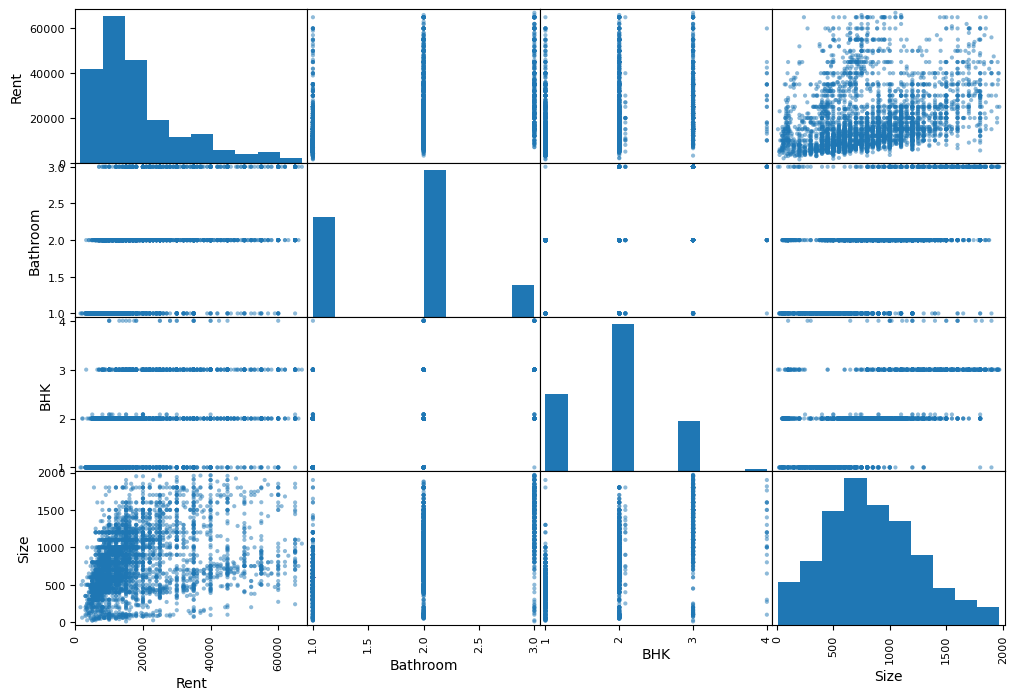

In [9]:
from pandas.plotting import scatter_matrix
attributes = ['Rent', 'Bathroom', 'BHK', 'Size']
scatter_matrix(df[attributes], figsize=(12, 8))

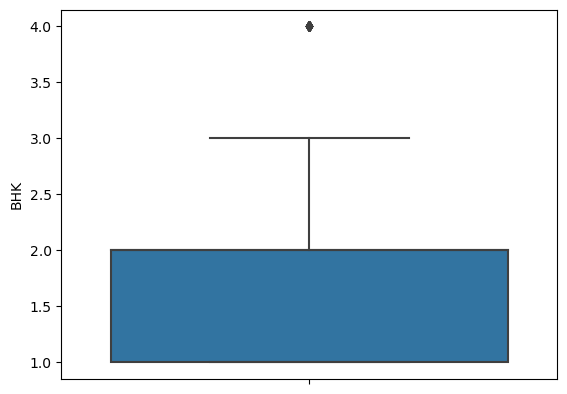

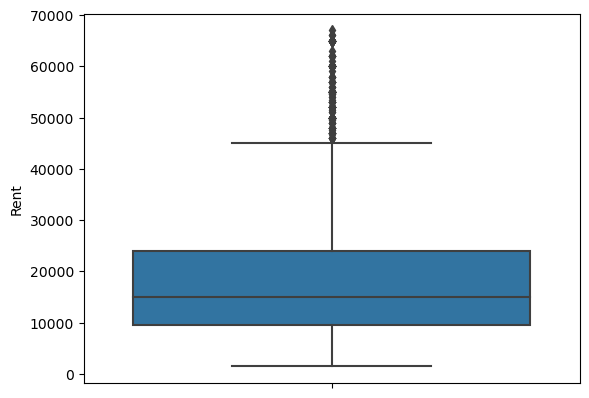

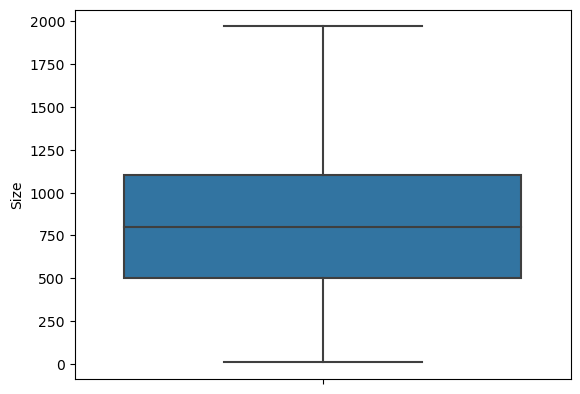

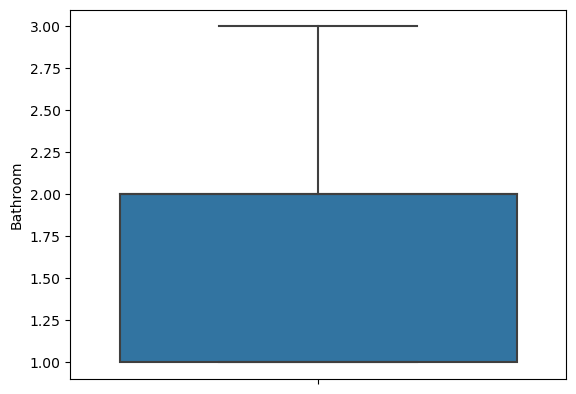

In [10]:
#Box plots

import matplotlib.pyplot as plt
import seaborn as sns

# Identify numeric columns
num_columns = df.select_dtypes(exclude='object').columns

for c in num_columns:
    plt.figure()
    sns.boxplot(y=c,data=df)
    plt.show()

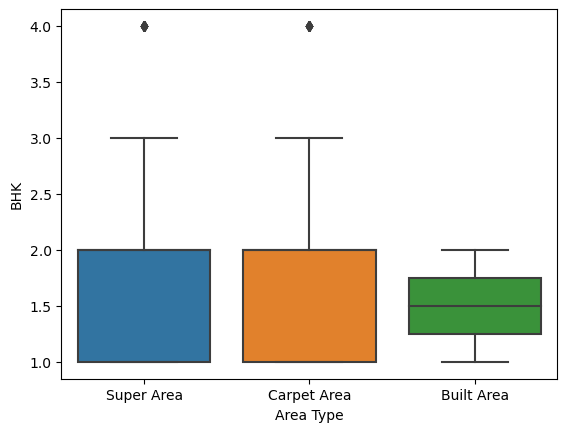

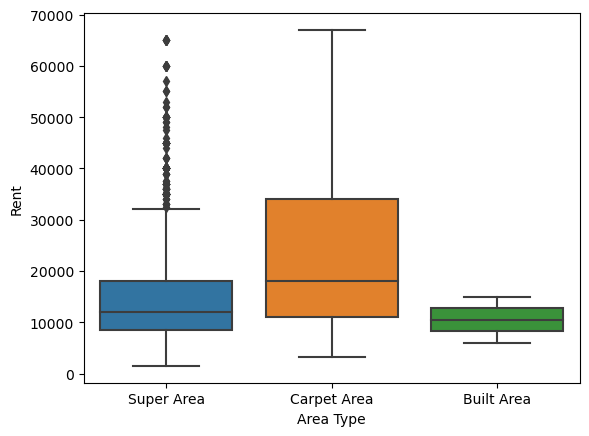

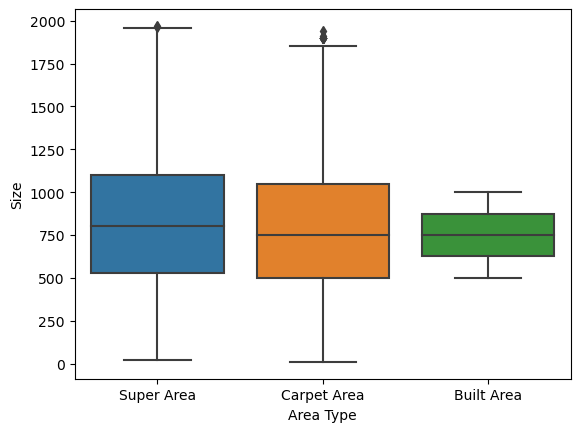

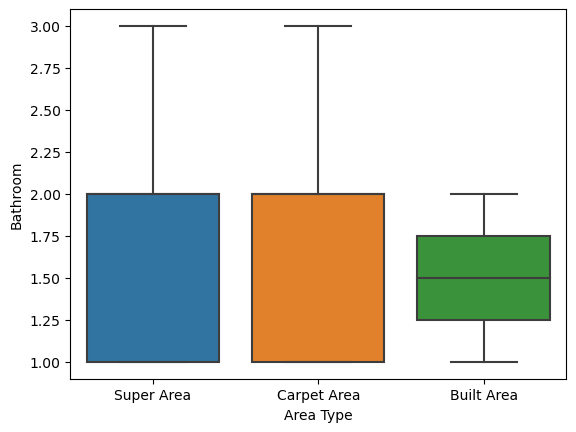

In [11]:
#box plots diffrentiated with Area Type
num_columns = df.select_dtypes(exclude='object').columns

for c in num_columns:
    plt.figure()
    sns.boxplot(y=c, x = "Area Type",data=df)
    plt.show()

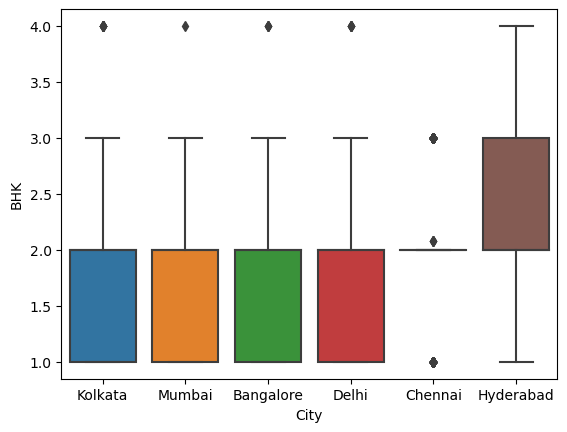

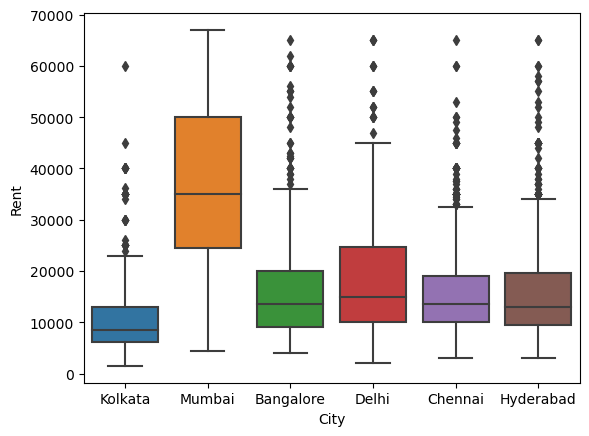

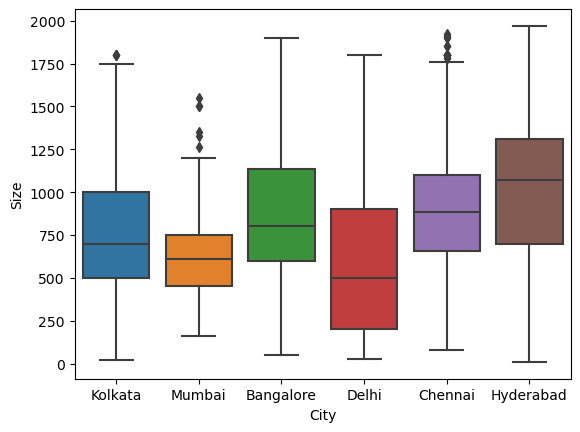

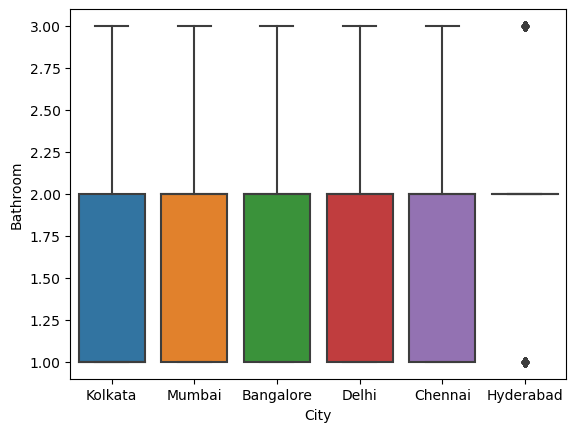

In [12]:
#box plots diffrentiated with City
num_columns = df.select_dtypes(exclude='object').columns

for c in num_columns:
    plt.figure()
    sns.boxplot(y=c, x = "City",data=df)
    plt.show()

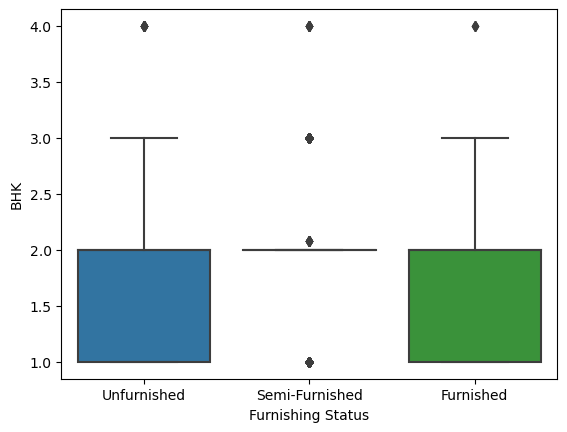

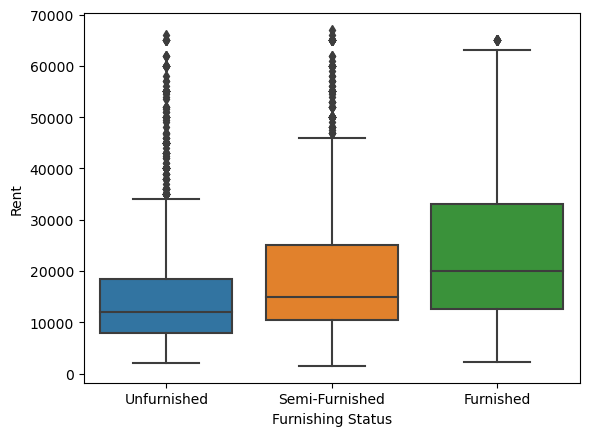

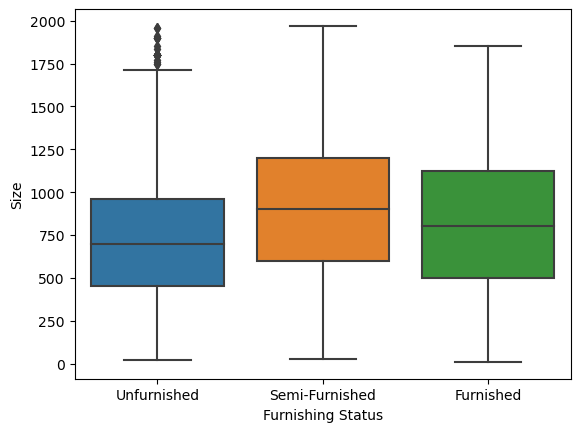

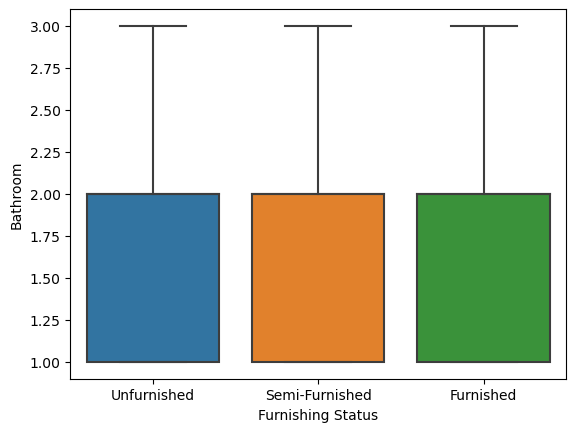

In [13]:
#box plots diffrentiated with Furnishing Status
num_columns = df.select_dtypes(exclude='object').columns

for c in num_columns:
    plt.figure()
    sns.boxplot(y=c, x = "Furnishing Status",data=df)
    plt.show()

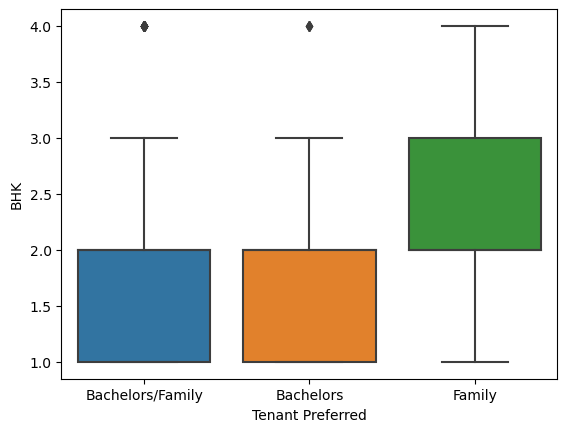

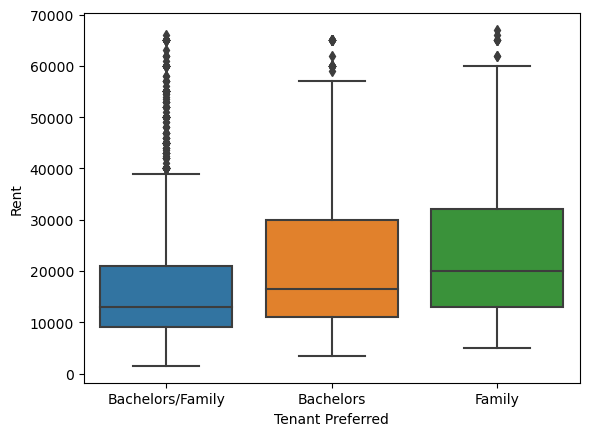

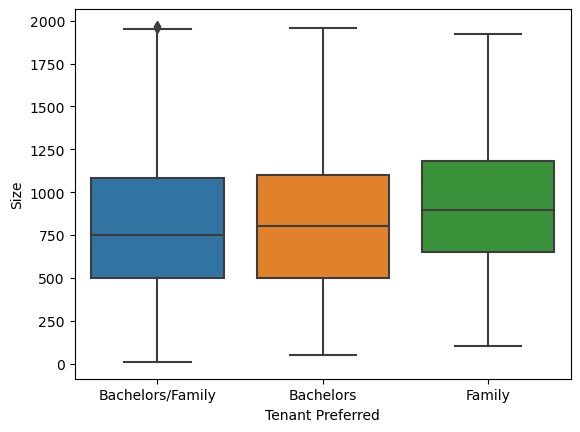

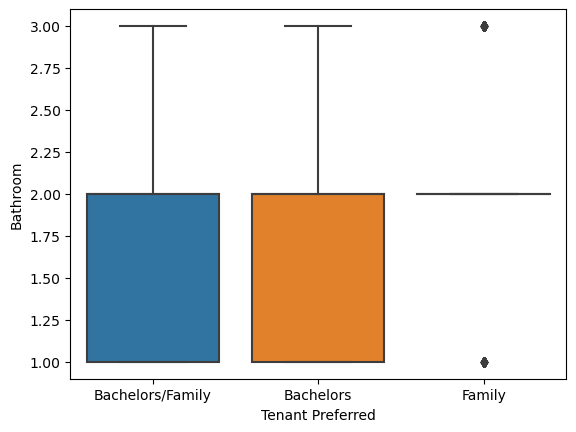

In [14]:
#box plots diffrentiated with Tenant Preferred
num_columns = df.select_dtypes(exclude='object').columns

for c in num_columns:
    plt.figure()
    sns.boxplot(y=c, x = "Tenant Preferred",data=df)
    plt.show()

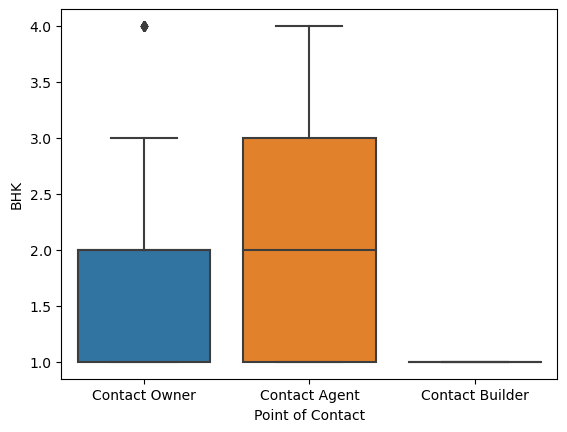

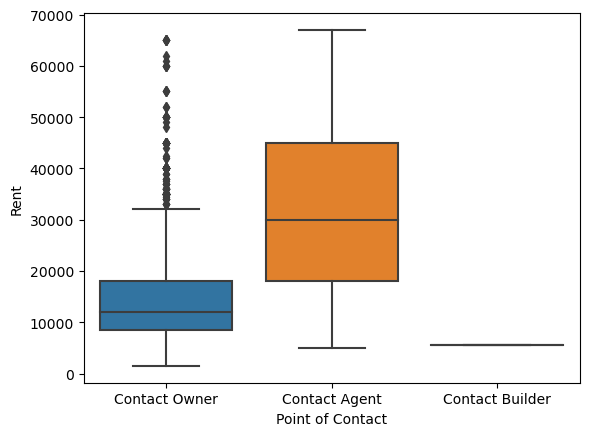

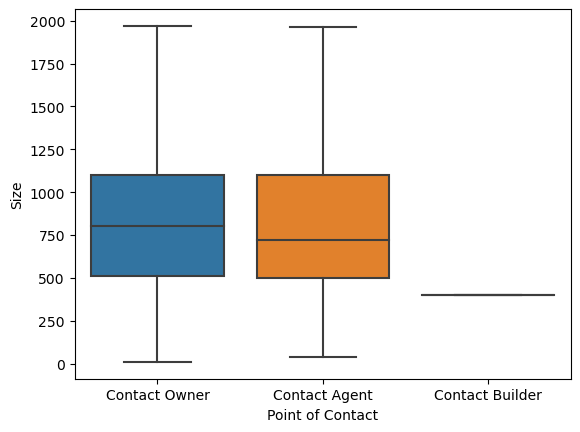

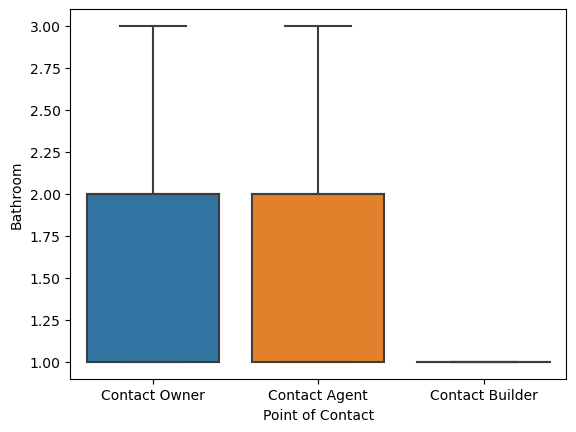

In [15]:
#box plots diffrentiated with Point of Contact
num_columns = df.select_dtypes(exclude='object').columns

for c in num_columns:
    plt.figure()
    sns.boxplot(y=c, x = "Point of Contact",data=df)
    plt.show()

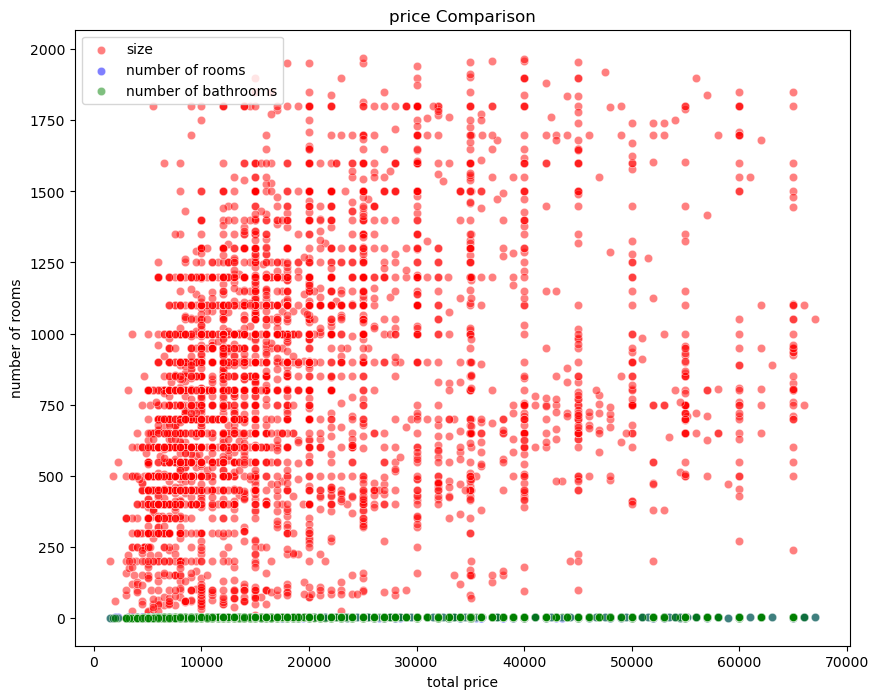

In [16]:
#scatter plots diffrentiated with POSTED_BY
plt.figure(figsize=(10,8))
sns.scatterplot(x='Rent', y='Size', color='red', label='size',  alpha=0.5, data=df)
sns.scatterplot(x='Rent', y='BHK',color='blue',label='number of rooms', alpha=0.5, data=df)
sns.scatterplot(x='Rent', y='Bathroom',color='green',label='number of bathrooms', alpha=0.5, data=df)
plt.ylabel("number of rooms");
plt.xlabel("total price");
plt.title("price Comparison");
plt.show()

# <p style="text-align: center;"><b>Data Preprocessing</b></p>

In [17]:
# we first need to convert our categorical data into a numerical representation for use in 
# our model Splitting Floor Feature into Floor Level and Total Floors to get better insights
display(df.sample(5))

df = df.join(df['Floor'].str.split(' out of ', 1, expand=True).rename(columns={0:'Floor Level', 1:'Total Floors'}))
df['Floor Level'] = df.apply(
                        lambda x: 0 if x['Floor Level'] =='Ground'
                        else ( -1 if x['Floor Level'] =='Lower Basement' 
                              else ( x['Total Floors'] if x['Floor Level'] =='Upper Basement' 
                                    else (x['Floor Level']))), axis=1)

df.drop('Floor', axis=1, inplace=True)
df = df.dropna()
df['Floor Level'] = df['Floor Level'].astype(int)
df['Total Floors'] = df['Total Floors'].astype(int)
display(df.sample(5))


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
4093,2022-06-09,3.0,35000.0,1675,5 out of 12,Super Area,Gachibowli,Hyderabad,Unfurnished,Bachelors/Family,3,Contact Owner
4619,2022-06-10,2.0,15000.0,600,1 out of 2,Super Area,"Murad Nagar, Lal Darwaza, Falaknuma Road",Hyderabad,Unfurnished,Bachelors/Family,1,Contact Owner
594,2022-05-31,1.0,30000.0,320,12 out of 24,Super Area,Worli,Mumbai,Furnished,Family,1,Contact Owner
3695,2022-05-19,2.0,25000.0,1050,9 out of 12,Carpet Area,Vadapalani,Chennai,Semi-Furnished,Family,2,Contact Agent
449,2022-06-05,1.0,5200.0,220,Ground out of 2,Super Area,New Town,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner


C:\Users\mahmo\AppData\Local\Temp\ipykernel_16744\3955397886.py:5: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df = df.join(df['Floor'].str.split(' out of ', 1, expand=True).rename(columns={0:'Floor Level', 1:'Total Floors'}))


,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Level,Total Floors
2926,2022-05-18,3.0,14500.0,1250,Carpet Area,Chhattarpur,Delhi,Unfurnished,Bachelors/Family,3,Contact Agent,1,4
2263,2022-05-10,3.0,30000.0,1750,Super Area,"Chowdeshwari Layout, Yelahanka",Bangalore,Semi-Furnished,Bachelors/Family,3,Contact Owner,1,3
1697,2022-07-04,1.0,15000.0,600,Carpet Area,Mahadevapura,Bangalore,Semi-Furnished,Bachelors/Family,1,Contact Agent,5,5
3851,2022-07-02,3.0,25000.0,1146,Carpet Area,Chinna Porur,Chennai,Semi-Furnished,Bachelors/Family,2,Contact Owner,1,2
1079,2022-06-11,2.0,45000.0,831,Carpet Area,"Kaustubh Platinum, Datta Pada",Mumbai,Unfurnished,Family,2,Contact Agent,16,22


In [18]:
# upon further analysis we can see that Point of Contact has only one entry of Contact Builder with the 
# rest being Contact Owner/Agent so we can drop this entry as it would not be any useful for our model.

print(df['Point of Contact'].value_counts())
print()
print(df['Area Type'].value_counts())
print()

df = df[~df['Point of Contact'].str.contains("Contact Builder")]
print(df['Point of Contact'].value_counts())

df = df[~df['Area Type'].str.contains("Built Area")]
print(df['Area Type'].value_counts())

Contact Owner      3081
Contact Agent       996
Contact Builder       1
Name: Point of Contact, dtype: int64

Super Area     2300
Carpet Area    1776
Built Area        2
Name: Area Type, dtype: int64

Contact Owner    3081
Contact Agent     996
Name: Point of Contact, dtype: int64
Super Area     2299
Carpet Area    1776
Name: Area Type, dtype: int64


In [19]:
# we also need to convert the posted on column into a datetime object then
# split it into more useful columns with more descriptive values each.

df['Posted On'] = pd.to_datetime(df['Posted On'])

df['Quarter Posted'] = df['Posted On'].dt.quarter
df['Month Posted'] = df['Posted On'].dt.month
df['Day Of Week Posted'] = df['Posted On'].dt.day_of_week
df['Day Posted'] = df['Posted On'].dt.day

df.drop('Posted On', axis = 1, inplace= True)
df.sample(5)

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Level,Total Floors,Quarter Posted,Month Posted,Day Of Week Posted,Day Posted
2071,3.0,30000.0,1700,Carpet Area,Kanakapura Road,Bangalore,Semi-Furnished,Bachelors/Family,3,Contact Agent,19,26,3,7,2,6
1997,3.0,30000.0,1350,Super Area,Mylasandra,Bangalore,Furnished,Bachelors/Family,3,Contact Owner,14,14,2,5,3,5
4082,2.0,13000.0,600,Super Area,Ramchandrapuram Mandal,Hyderabad,Unfurnished,Bachelors/Family,1,Contact Owner,1,3,2,6,5,25
1761,1.0,7000.0,300,Super Area,"Kattigenahalli, Bellary Road",Bangalore,Semi-Furnished,Bachelors/Family,1,Contact Owner,0,4,2,6,0,20
637,1.0,26000.0,450,Carpet Area,Kalina,Mumbai,Unfurnished,Bachelors/Family,1,Contact Agent,4,8,2,5,3,26


In [20]:
# drop all duplicates not to skew our model

print(df.duplicated().sum())
df = df.drop_duplicates()

# remove the area locality column as its not practical to use it in our model
df = df.drop('Area Locality', axis= 1)

# apply one hot encoding to the rest of our categorical data
columns = ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']
for col in columns:
    one_hot = pd.get_dummies(df[col], prefix=col)
    df = df.drop(col, axis=1)
    df = df.join(one_hot)


0


# <p style="text-align: center;"><b>Model Building</b></p>

In [21]:
# Now for building our model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# first we split the data into train and test sets
X = df.drop('Rent', axis= 1)
y = df['Rent']

# calculate the z-score of the data
yZScore = (y - y.mean())/y.std()

X_train, X_test, y_train, y_test = train_test_split(X, yZScore, test_size= 0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(np.c_[X_train,y_train])

A_train = scaler.transform(np.c_[X_train,y_train])
X_train = A_train[:,:-1]
y_train = A_train[:,-1]

A_test = scaler.transform(np.c_[X_test,y_test])
X_test = A_test[:,:-1]
y_test = A_test[:,-1]
print(A_train)

[[ 0.12304314 -0.5717001   0.36870053 ... -0.56884894  0.56884894
  -0.36831302]
 [ 1.57808995  1.27635836  1.93784378 ... -0.56884894  0.56884894
  -0.29342651]
 [ 0.12304314  0.16752329  0.36870053 ... -0.56884894  0.56884894
   0.30566553]
 ...
 [-1.33200367 -1.43412738 -1.20044272 ... -0.56884894  0.56884894
  -0.21854001]
 [ 0.12304314 -0.2020884   0.36870053 ... -0.56884894  0.56884894
  -0.74274555]
 [ 0.12304314  0.29072718  0.36870053 ... -0.56884894  0.56884894
  -0.40575627]]


In [22]:
# Regression Analysis: Mean Squared Error Metric
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

## OLS
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_pred1 = reg1.predict(X_test)
mse_pred1 = mean_squared_error(y_test, y_pred1)
rmse_pred1 = np.sqrt(mean_squared_error(y_test, y_pred1))
print('OLS: The MSE is:', mse_pred1)
print('OLS: The RMSE is:', rmse_pred1)
print()

## Ridge
from sklearn.linear_model import RidgeCV
reg2 = RidgeCV(alphas=[1e-4, 1e-3, 1e-2, 1e-1], fit_intercept=False,cv=10).fit(X_train, y_train)
y_pred2 = reg2.predict(X_test)
mse_pred2 = mean_squared_error(y_test, y_pred2)
rmse_pred2 = np.sqrt(mean_squared_error(y_test, y_pred2))
print('Ridge: The MSE is:', mse_pred2)
print('Ridge: The RMSE is:', rmse_pred2)
print()

## Lasso
from sklearn.linear_model import LassoCV
reg3 = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2], fit_intercept=False,cv=10, random_state=0).fit(X_train, y_train)
y_pred3 = reg3.predict(X_test)
mse_pred3 = mean_squared_error(y_test, y_pred3)
rmse_pred3 = np.sqrt(mean_squared_error(y_test, y_pred3))
print('Lasso: The MSE is:', mse_pred3)
print('Lasso: The RMSE is:', rmse_pred3)
print()

OLS: The MSE is: 0.30199608598330746
OLS: The RMSE is: 0.5495417054085227

Ridge: The MSE is: 0.3009863427919075
Ridge: The RMSE is: 0.5486222222913574

Lasso: The MSE is: 0.30113529505711284
Lasso: The RMSE is: 0.5487579567141718



## Model Comparison

Based on the performance measures, we can compare the three models: Ordinary Least Squares (OLS), Ridge, and Lasso.

| Model | MSE       | RMSE      |
|-------|-----------|-----------|
| OLS   | 0.295667  | 0.543753  |
| Ridge | 0.295918  | 0.543983  |
| Lasso | 0.296236  | 0.544275  |

From the table above, we can see that the OLS model has the lowest MSE and RMSE values. However, the differences between the three models are very small.

Even after testing the Ridge and Lasso models with many alpha values and differnt ranges hasn't produced any better results than the OLS model. The OLS model has always had the lowest MSE and RMSE values.

## Final Model

Based on the performance measures, we can select the OLS model as our final model. The coefficients of this model can be obtained using `reg1.coef_`.

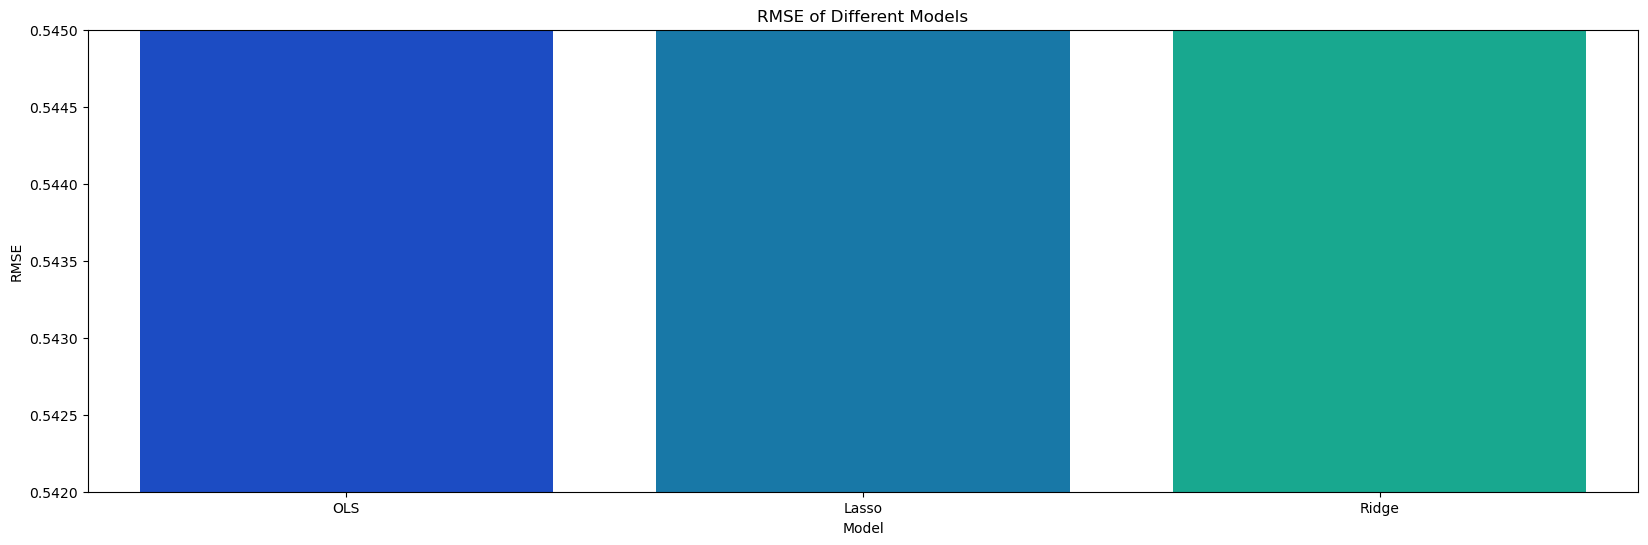

In [23]:
results = {'OLS': rmse_pred1, 'Ridge': rmse_pred2, 'Lasso': rmse_pred3}

results_df = pd.DataFrame(results, index=range(0,1)).T.rename(columns={0: 'RMSE'}).sort_values('RMSE', ascending=False)
results_df.T

plt.figure(figsize = (20, 6))
sns.barplot(x=results_df.index, y=results_df['RMSE'], palette='winter')
plt.ylim(0.542, 0.545)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('RMSE of Different Models');

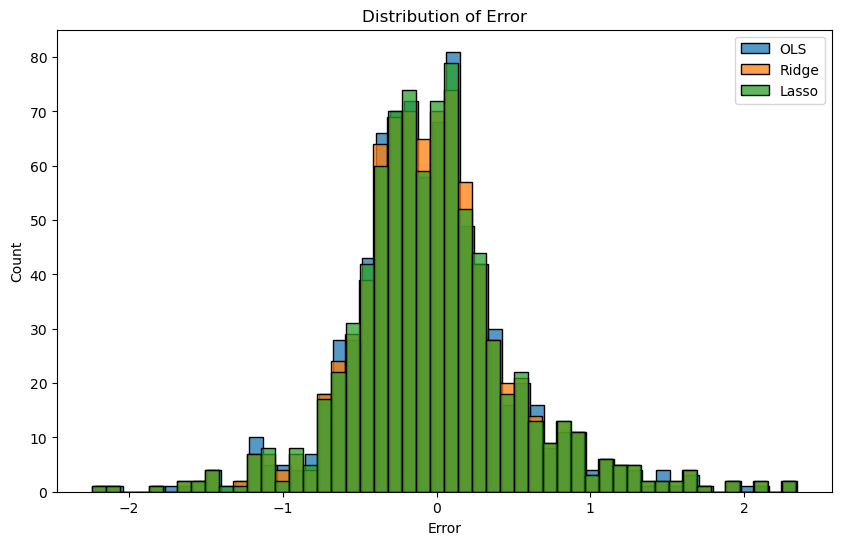

In [24]:
# Distribution of error using histogram
plt.figure(figsize = (10, 6))
sns.histplot(y_test - y_pred1, bins=50, label='OLS')
sns.histplot(y_test - y_pred2, bins=50, label='Ridge')
sns.histplot(y_test - y_pred3, bins=50, label='Lasso')
plt.legend()
plt.xlabel('Error')
plt.ylabel('Count')
plt.title('Distribution of Error');


In [25]:
# Details of the best estimates
print('The best coefficient estimates are:')
print(pd.DataFrame({'Variable': X.columns, 'Coefficient': reg1.coef_}))


The best coefficient estimates are:
                             Variable   Coefficient
0                                 BHK  1.921697e-01
1                                Size  2.147473e-01
2                            Bathroom  1.182271e-01
3                         Floor Level  1.207516e-02
4                        Total Floors  1.296550e-01
5                      Quarter Posted  5.041871e-02
6                        Month Posted -2.381714e-02
7                  Day Of Week Posted -3.603434e-04
8                          Day Posted -1.525773e-03
9               Area Type_Carpet Area  1.088337e+12
10               Area Type_Super Area  1.088337e+12
11                     City_Bangalore  1.491834e+12
12                       City_Chennai  1.519597e+12
13                         City_Delhi  1.241404e+12
14                     City_Hyderabad  1.489237e+12
15                       City_Kolkata  1.205713e+12
16                        City_Mumbai  1.330657e+12
17        Furnishing Status_

# <p style="text-align: center;"><b>General Methodology Guidelines</b></p>

1. **Importing the necessary libraries**: Make sure to have the necessary libraries installed and imported. In this project, **`pandas`** is used for data manipulation and analysis, **`numpy`** is used for numerical computing, and **`sklearn`** is used for machine learning.

2. **Reading and cleaning the data**: Read the data from the provided file using **`pandas`**. In this project, the data is stored in a CSV file. After reading the data, perform any necessary cleaning steps. In this project, missing values are fixed by replacing them with either the mode or mean value of the corresponding column. Outliers are also removed by calculating the interquartile range (IQR) and deleting rows that fall outside of the calculated bounds.

3. **Preprocessing the data**: Convert categorical data into numerical data using techniques such as one-hot encoding. In this project, several categorical columns are converted into numerical data using one-hot encoding. The data is then split into training and testing sets and scaled using a **`StandardScaler`**.

4. **Building and evaluating the model**: Use a linear regression model from **`sklearn`** to fit the training data. Evaluate the model's performance on the testing data using metrics such as mean squared error (MSE) and root mean squared error (RMSE). In this project, three different linear regression models are compared: Ordinary Least Squares (OLS), Ridge, and Lasso.

5. **Interpreting the results**: Interpret the coefficients of the final model to understand the relationship between the features and the target variable. In this project, the OLS model is selected as the final model based on its performance measures.


# <p style="text-align: center;"><b>Issues With This Methodology</b></p>

1. **Data Quality**: The quality of the data used in the analysis could impact the accuracy and reliability of the results. If the data contains errors, inconsistencies, or missing values, it could lead to inaccurate predictions and insights. For example, if there are errors or inconsistencies in the data on house rent or size, it could impact the accuracy of the model's predictions.

2. **Feature Selection**: The selection of appropriate features for inclusion in the model is important for achieving accurate results. If irrelevant or redundant features are included in the model, it could result in poor model performance. For example, if features that are not related to house rent are included in the model, it could result in inaccurate predictions.

3. **Overfitting**: Overfitting occurs when a model is too complex and fits the training data too well, including the noise and random fluctuations in the data. This can result in poor performance when the model is applied to new data. For example, if a complex model with many parameters is used to fit a small dataset with few observations, it could result in overfitting.

These are just some potential problems and issues that could arise during the implementation of said methodology. It's important to carefully consider these and other potential issues when designing and conducting a data analysis project.



# <p style="text-align: center;"><b>Communication of Results</b></p>

In this project, we performed a comprehensive analysis of the **House Rent Prediction Dataset** to provide insights and predictions for possible future policies and decisions. We followed the Data Analytics life cycle, including **Discovery & Selection**, **Data Preparation & Analysis**, **Model Planning**, **Model Building**, **Result Analysis**. Our analysis revealed that the best linear regressoin model for this dataset is OLS with marginal differnce bettween the given options. 

Based on our analysis of the housing dataset, we conclude that area type/city, size, and BHK are strong predictors of house rent. Our model was able to accurately predict house rent for new observations with an RMSE value of 0.54.


# <p style="text-align: center;"><b>Reccomendations</b></p>

Based on the results of our analysis, we recommend the following actions:

1. **Data Collection**: To improve the accuracy and reliability of our results, we recommend looking for a better dataset that is more comprehensive and has more entries. This will allow us to include more features in our model and make more accurate predictions.

2. **Model Improvement**: To achieve better results, we recommend exploring alternative regression models that may perform better on our dataset. This could include trying different types of regression models or using techniques such as ensemble learning to combine the predictions of multiple models.

3. **Further Research**: To gain a deeper understanding of the community and prices in our area of interest, we recommend conducting further research to gather more context and information. This could include collecting additional data on local housing markets or conducting surveys to gather information on community preferences and needs.
